<a href="https://colab.research.google.com/github/IndraniMandal/New-Revisions/blob/main/Model_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Metrics

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import io
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

##Load heart attck data

In [ ]:
heart = pd.read_csv("https://raw.githubusercontent.com/dpereztorres/2023WinterInternship/main/heart.csv")
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##Load Fraud data

In [ ]:
fraud = pd.read_csv("https://raw.githubusercontent.com/dpereztorres/2023WinterInternship/main/cleanFraud.csv")
fraud.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,11,5,3,0,0,2,0,1,1,0,...,3,0,0,0,0,2,2,1994,0,No
1,0,3,3,0,0,1,0,4,0,0,...,4,1,0,0,0,0,0,1994,1,No
2,9,5,5,0,0,4,10,2,0,1,...,6,0,0,0,0,0,0,1994,1,No
3,5,2,6,1,1,5,6,1,0,1,...,7,1,0,0,3,0,0,1994,0,No
4,0,5,1,0,0,2,1,2,1,0,...,4,0,0,0,0,0,0,1994,1,No


# Confusion Matrix
 
<img src = "https://drive.google.com/uc?id=12RhzPLgwasRVdtsU-8waL5vJhywafYXy" width=400>

Image Source: [Confusion Matrix](https://subscription.packtpub.com/book/big-data-and-business-intelligence/9781838555078/6/ch06lvl1sec34/confusion-matrix)

Site 1: [Accuracy, Precision, Recall & F1-Score – Python Examples](https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/)

Requires description of confusion matrix

A true positive (TP) is a value is correctly predicted to be true, while a false positive (FP) is a value that is incorrectly predicted to be false. The situation is vice versa for true negatives (TN) where a value is correctly predicted negative, and false negatives (FN) are incorrectly predicted as negative.

## Building a model using the fraud dataset

In [ ]:
X  = fraud.drop(['FraudFound'],axis=1)
y = fraud['FraudFound']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7, test_size=0.3,random_state=2)

In [ ]:
model = tree.DecisionTreeClassifier(criterion='entropy')

model.fit(X_train, y_train)

y_train_model = model.predict(X_train)

y_test_model = model.predict(X_test)

## Building a model using the heart attck dataset

In [ ]:
X_heart  = heart.drop(['output'],axis=1)
y_heart = heart['output']

In [ ]:
X_h_train,X_h_test,y_h_train,y_h_test=train_test_split(X_heart,y_heart,train_size=0.7, test_size=0.3,random_state=2)

In [ ]:
model = tree.DecisionTreeClassifier(criterion='entropy')

model.fit(X_h_train, y_h_train)

y_h_train_model = model.predict(X_h_train)

y_h_test_model = model.predict(X_h_test)

Confusion Matrix for the Chron's disease dataset, where there are:

31 true negatives

10 false negatives

44 true positives

6 false positives

This dataset is seemingly balanced.

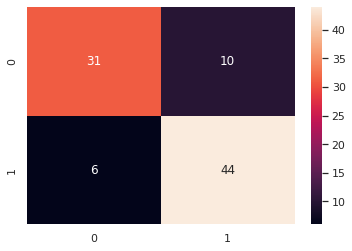

In [ ]:
cm = confusion_matrix(y_h_test, y_h_test_model)
f = sns.heatmap(cm, annot=True, fmt='d')

Confusion Matrix for the fraud dataset, where there are:

4118 true negatives

221 false negatives

112 true positives

175 false positives

This dataset is unbalanced, heavily favoring true negatives.

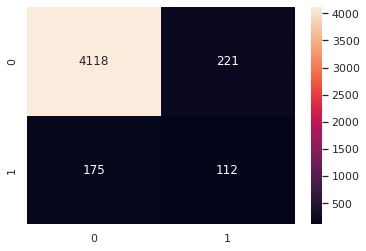

In [ ]:
cm = confusion_matrix(y_test, y_test_model)
f = sns.heatmap(cm, annot=True, fmt='d')

# Precision Score

Precision = $ \frac{TP}{TP+FP}$




The precision score is mainly used for test cases where accurately identifying true positives and true negatives is the upmost importance. For example, accurately determining if someone has cancer or not is extremely important for that person's decision making. The cost of inaccurately identifying true positives and true negatives is very high.

$\frac{TP}{TP+FP} = \frac{44}{44+31} = 0.8148$

In [ ]:
print("Precision Accuracy: {:3.2f}".format(precision_score(y_h_test,y_h_test_model, average = 'weighted')))

Precision Accuracy: 0.83


# Recall Score

Recall = $ \frac{TP}{TP+FN}$

The recall score is mainly used for test cases where accurately identifying false positives and false negatives is the upmost importance. For example, an insurance company needs to properly identify if a claimant is committing fraud. If a fraudster is given an insurance claim, it would cost the company more than them denying the claim. 

Image Source: [Performance Metrics: Confusion matrix, Precision, Recall, and F1 Score](https://towardsdatascience.com)

$\frac{TP}{TP+FN} = \frac{44}{44+31} = 0.8148$

In [ ]:
print("Recall Accuracy: {:3.2f}".format(recall_score(y_test,y_test_model, average = 'weighted')))

Recall Accuracy: 0.92


For more examples of when to use either accuracy score: [Precision-Recall Tradeoff in Real-World Use Cases
](https://medium.com/analytics-vidhya/precision-recall-tradeoff-for-real-world-use-cases-c6de4fabbcd0)

# Accuracy Score

Accuracy = $\frac{TP + TN}{TP + FN + TN + FP}$

In [ ]:
print("Accuracy Score: {:3.2f}".format(accuracy_score(y_h_test,y_h_test_model)))

Accuracy Score: 0.82


# F1 Score

<font size="5">  
F1 Score = $\frac{2}{\frac{1}{Precision}+\frac{1}{Recall}} = \frac{2*(Precision*Recall)}{(Precision+Recall)}$

Balanced between recall and precision. Mainly used in imbalanced sets, i.e. when one target variable appears drastically more often than another, just like in the fraud dataset.

In [ ]:
print("F1 Score: {:3.2f}".format(f1_score(y_test, y_test_model, average='weighted')))

F1 Score: 0.92


##Balanced Accuracy
Balanced Accuracy = $\frac{1}{2}$ $({\frac{TP}{P} + \frac{TN}{N}})$

= $\frac{1}{2}$ $({\frac{TP}{TP+FN} + \frac{TN}{TN+FP}})$


True positive rate 

Sensitivity = $\frac{TP}{TP + FN}$

True negative rate

Specificity = $\frac{TN}{TN + FP}$



Balanced score is used in imbalanced sets, i.e. when one target variable appears drastically more often than another, just like in the fraud dataset.


Image source: https://neptune.ai/blog/balanced-accuracy

In [ ]:
from sklearn.metrics import balanced_accuracy_score
print("Balanced Accuracy: {:3.2f}".format(balanced_accuracy_score(y_test,y_test_model)))

Balanced Accuracy: 0.67
